<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione e su un subset delle prime 500 righe:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta con l'output del tuo modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità?


**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi




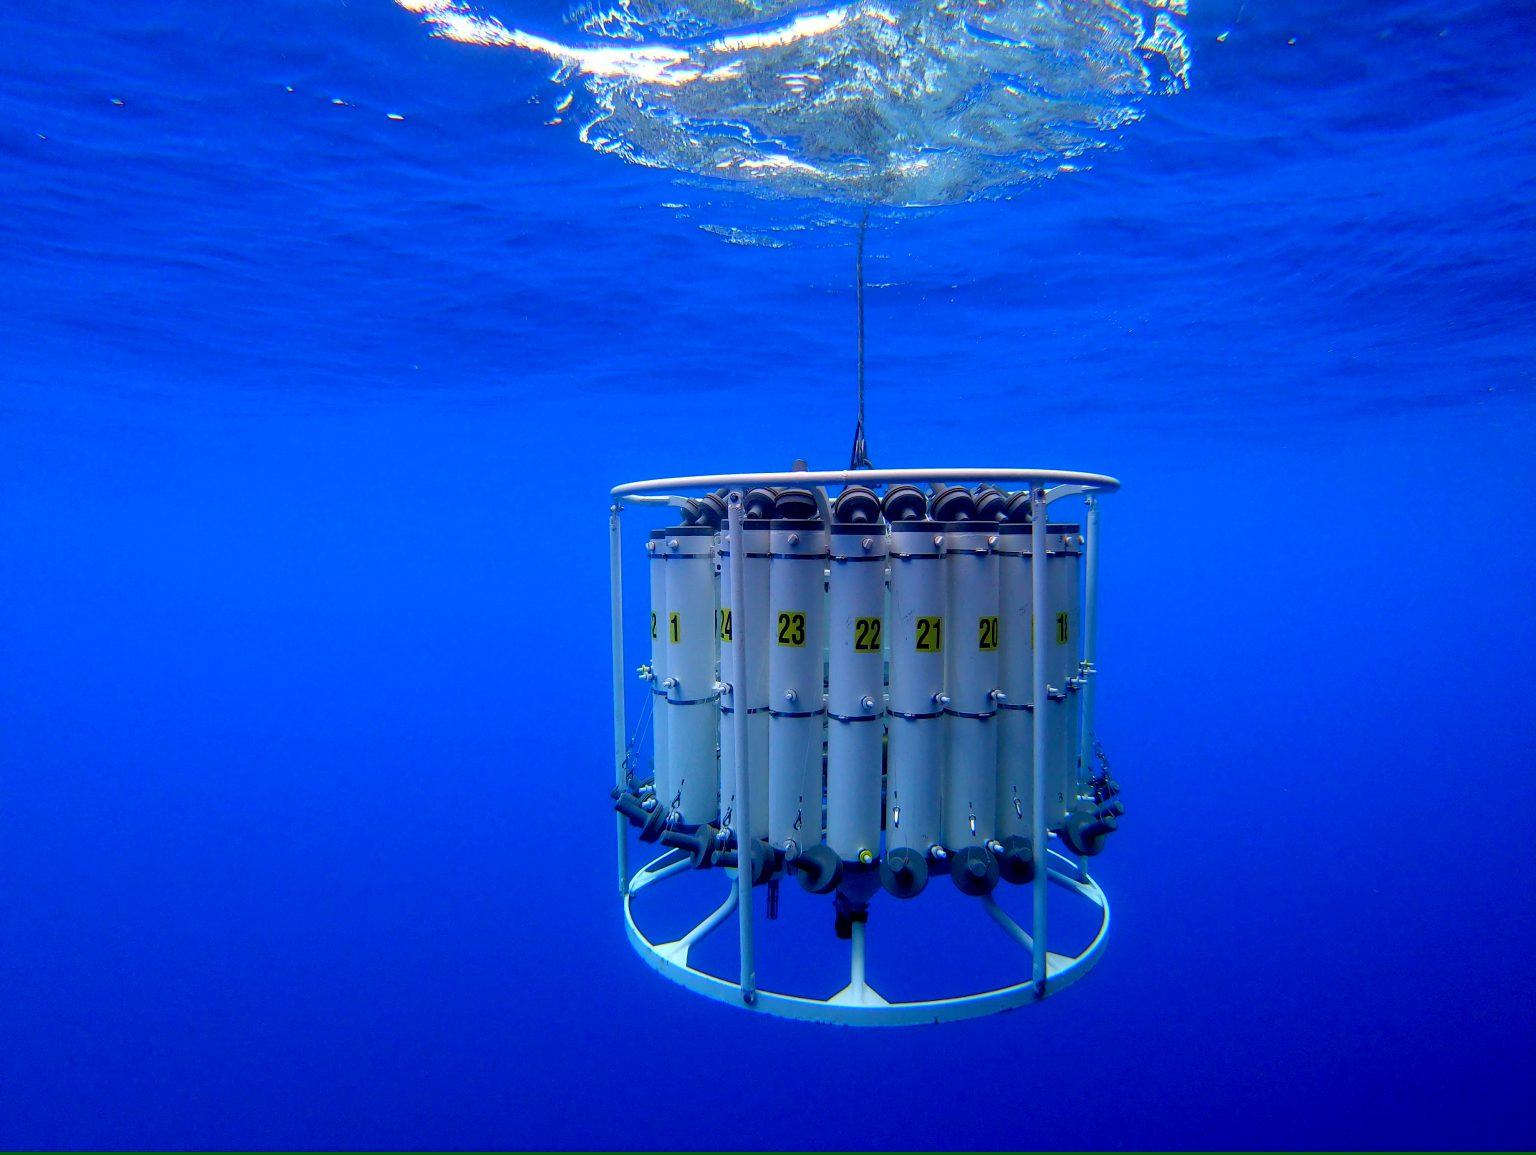

In [14]:
from IPython.display import Image
Image(filename='bottles.jpg', width=1200)

I dati inseriti nel dataset bottle.csv provengono da numerosi campionamenti di acqua salina prelevata a differenti profondità marine utilizzando delle bottiglie Niskin da 10 litri installate su un telaio CTD-Rosette come visibile in figura.

_Source_: https://calcofi.org/data/oceanographic-data/bottle-database/


### Load Modules

In [15]:
#Load modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from dtreeviz.trees import dtreeviz
import warnings

warnings.filterwarnings('ignore')


### Import Dataset

In [16]:
bottle = pd.read_csv("bottle.csv")[['Salnty', 'T_degC', 'Depthm']]

In [17]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774325 entries, 0 to 774324
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  727017 non-null  float64
 1   T_degC  763367 non-null  float64
 2   Depthm  774325 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 17.7 MB


In [18]:
bottle.describe()

Salnty         T_degC         Depthm
count  727017.000000  763367.000000  774325.000000
mean       33.857687      10.768610     233.671586
std         0.465098       4.302132     325.307279
min        28.431000       1.440000       0.000000
25%        33.506000       7.610000      49.000000
50%        33.887000      10.030000     125.000000
75%        34.211000      13.870000     300.000000
max        37.034000      31.140000    5351.000000

### Data Cleaning

In [19]:
bottle = bottle.iloc[0:500,:] #Select first 500 data samples
bottle = bottle.dropna() #Drop NA values
bottle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  493 non-null    float64
 1   T_degC  493 non-null    float64
 2   Depthm  493 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.4 KB


### Exploratory Data Analysis

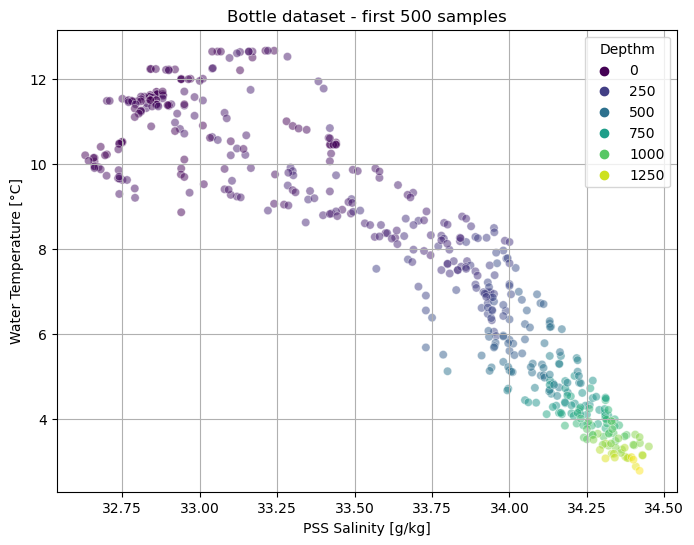

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Bottle dataset - first 500 samples')
plt.show()

Dallo scatter plot dei primi 500 samples si può notare una forte correlazione fra salinità e temperatura dell'acqua marina, quest'ultima che diminuisce all'aumentare della prima. E' inoltre evidente come i campioni a maggiore salinità siano stati prelevati a profondità maggiori dell'oceano, evidenziando un'ulteriore correlazione fra salinità e profondità marina.

### Train Test Split

In [21]:
X = bottle['Salnty']
y = bottle['T_degC']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [23]:
#Initialization metrics
r_2_train = np.empty(4, dtype=object) 
r_2_test = np.empty(4, dtype=object) 
mse = np.empty(4, dtype=object) 
mae = np.empty(4, dtype=object) 

### Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)


r_2_train[0] = lr.score(X_train,y_train)
r_2_test[0] = lr.score(X_test,y_test)
mse[0] = mean_squared_error(y_test, y_pred_lr)
mae[0] = mean_absolute_error(y_test, y_pred_lr)

coef = lr.coef_
intercept = lr.intercept_

print('\nR2 train score:', r_2_train[0])  #Print R^2
print('\nR2 test score:', r_2_test[0])  #Print R^2
print('\nMean Squared Error:', mse[0])  #Print Mean Squared Error
print('\nMean Absolute Error:', mae[0])  #Print Mean Absolute Error
print('\nCoefficients:',coef) #Print Slope Coefficients
print('\nIntercept:', intercept) #Print Intercept


R2 train score: 0.8571265655143632

R2 test score: 0.8283451511977139

Mean Squared Error: 1.4162159348738739

Mean Absolute Error: 0.9395757292367463

Coefficients: [[-4.81561542]]

Intercept: [169.74007507]


In [25]:
X_test_ordered = np.sort(X_test, axis=0)
index = np.argsort(X_test, axis=0).reshape(-1)
y_pred_lr_ordered = y_pred_lr[index]

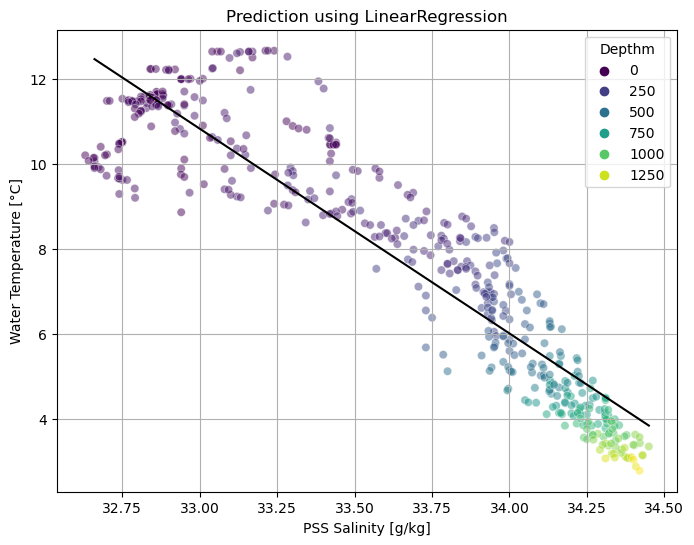

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_lr_ordered, label="Linear regression", color='k')
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using LinearRegression')
plt.show()

In [27]:
#Predict values outside X range
x_1 = np.array([[30,31,32,33,34,35,36,37,38]])
x_1 = x_1.reshape(-1, 1)
y_pred_lr_1 = lr.predict(x_1)
y_pred_lr_1

array([[ 25.27161238],
       [ 20.45599696],
       [ 15.64038153],
       [ 10.82476611],
       [  6.00915069],
       [  1.19353526],
       [ -3.62208016],
       [ -8.43769558],
       [-13.253311  ]])

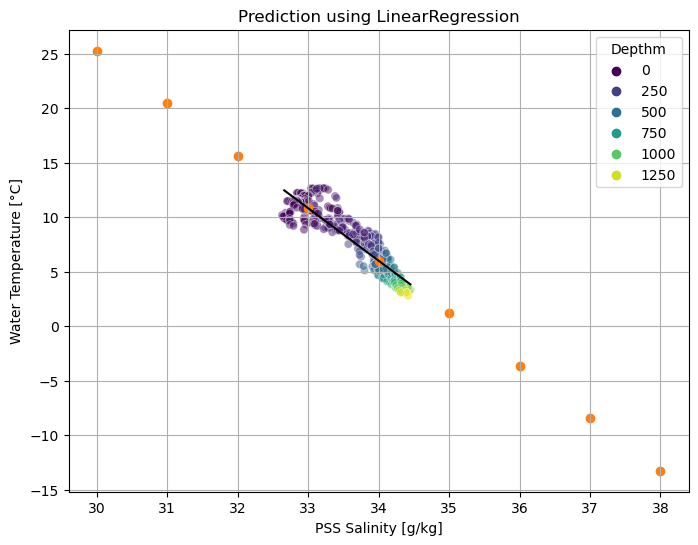

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_lr_ordered, label="Linear regression", color='k')
plt.scatter(x_1, y_pred_lr_1)
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using LinearRegression')
plt.show()

E' interessante notare come l'algoritmo LinearRegression() riesca a stimare in modo credibile valori di temperatura dell'acqua marina al di fuori dal range dei valori di salinità presenti nel dataset ridotto a 500 sample.

### Decision Tree Regressor

In [29]:
dtr = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=9)
dtr.fit(X_train,y_train)
y_pred_dt = dtr.predict(X_test)

r_2_train[1] = dtr.score(X_train,y_train)
r_2_test[1] = dtr.score(X_test,y_test)
mse[1] = mean_squared_error(y_test, y_pred_lr)
mae[1] = mean_absolute_error(y_test, y_pred_lr)

print('\nR2 train score:', r_2_train[1])  #Print R^2
print('\nR2 test score:', r_2_test[1])  #Print R^2
print('\nMean Squared Error:', mse[1])  #Print Mean Squared Error
print('\nMean Absolute Error:', mae[1])  #Print Mean Absolute Error


R2 train score: 0.9241565296977248

R2 test score: 0.9141444846512349

Mean Squared Error: 1.4162159348738739

Mean Absolute Error: 0.9395757292367463


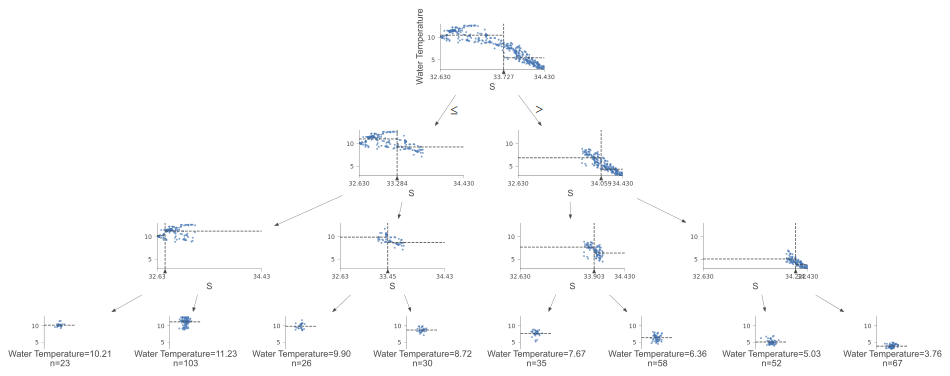

In [30]:
# Visualize Decision Tree Regressor

viz = dtreeviz(dtr, X_train, y_train,
                target_name='Water Temperature',
                feature_names='Salinity')
viz

In [31]:
y_pred_dt_ordered = y_pred_dt[index]

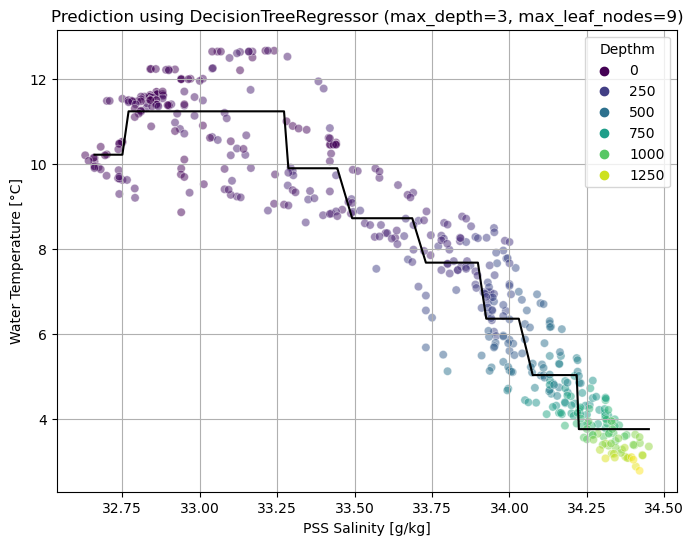

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_dt_ordered, label="Decision Tree Regressor", color='k')
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using DecisionTreeRegressor (max_depth=3, max_leaf_nodes=9)')
plt.show()


In [33]:
#Predict values outside X range
x_2 = np.array([[30,31,32,33,34,35,36,37,38]])
x_2 = x_2.reshape(-1, 1)
y_pred_dtr_2 = dtr.predict(x_2)
y_pred_dtr_2

array([10.21391304, 10.21391304, 10.21391304, 11.23417476,  6.3562069 ,
        3.75835821,  3.75835821,  3.75835821,  3.75835821])

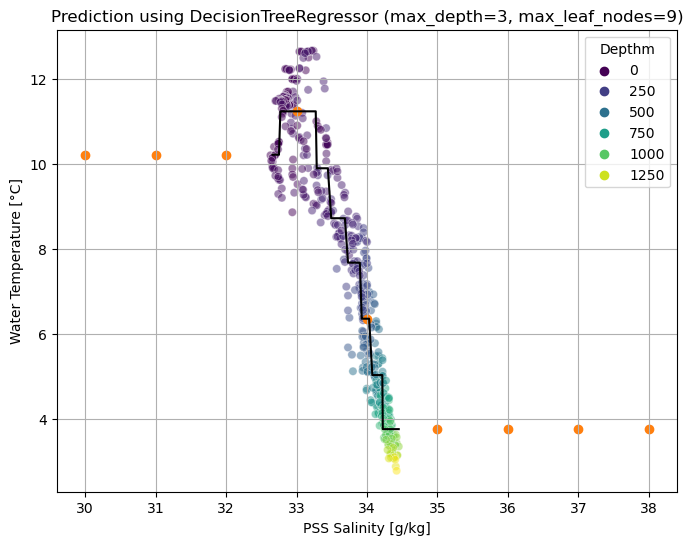

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_dt_ordered, label="Decision Tree Regressor", color='k')
plt.scatter(x_2, y_pred_dtr_2)
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using DecisionTreeRegressor (max_depth=3, max_leaf_nodes=9)')
plt.show()

A differenza dell'algoritmo LinearRegression() che, come visto in precedenza, riesce a stimare in modo credibile valori di temperatura al di fuori del range di salinità presente nel dataset, l'algoritmo DecisionTreeRegressor() non si comporta altrettanto bene fuori da tale range. I valori stimati all'esterno del range considerato assumono all'infinito dei valori costanti che corrispondono ai valori dei leaf nodes più esterni all'albero. Questo modello è chiaramente poco realistico e incompatibile con la fisica del fenomeno al di fuori del range del dataset.

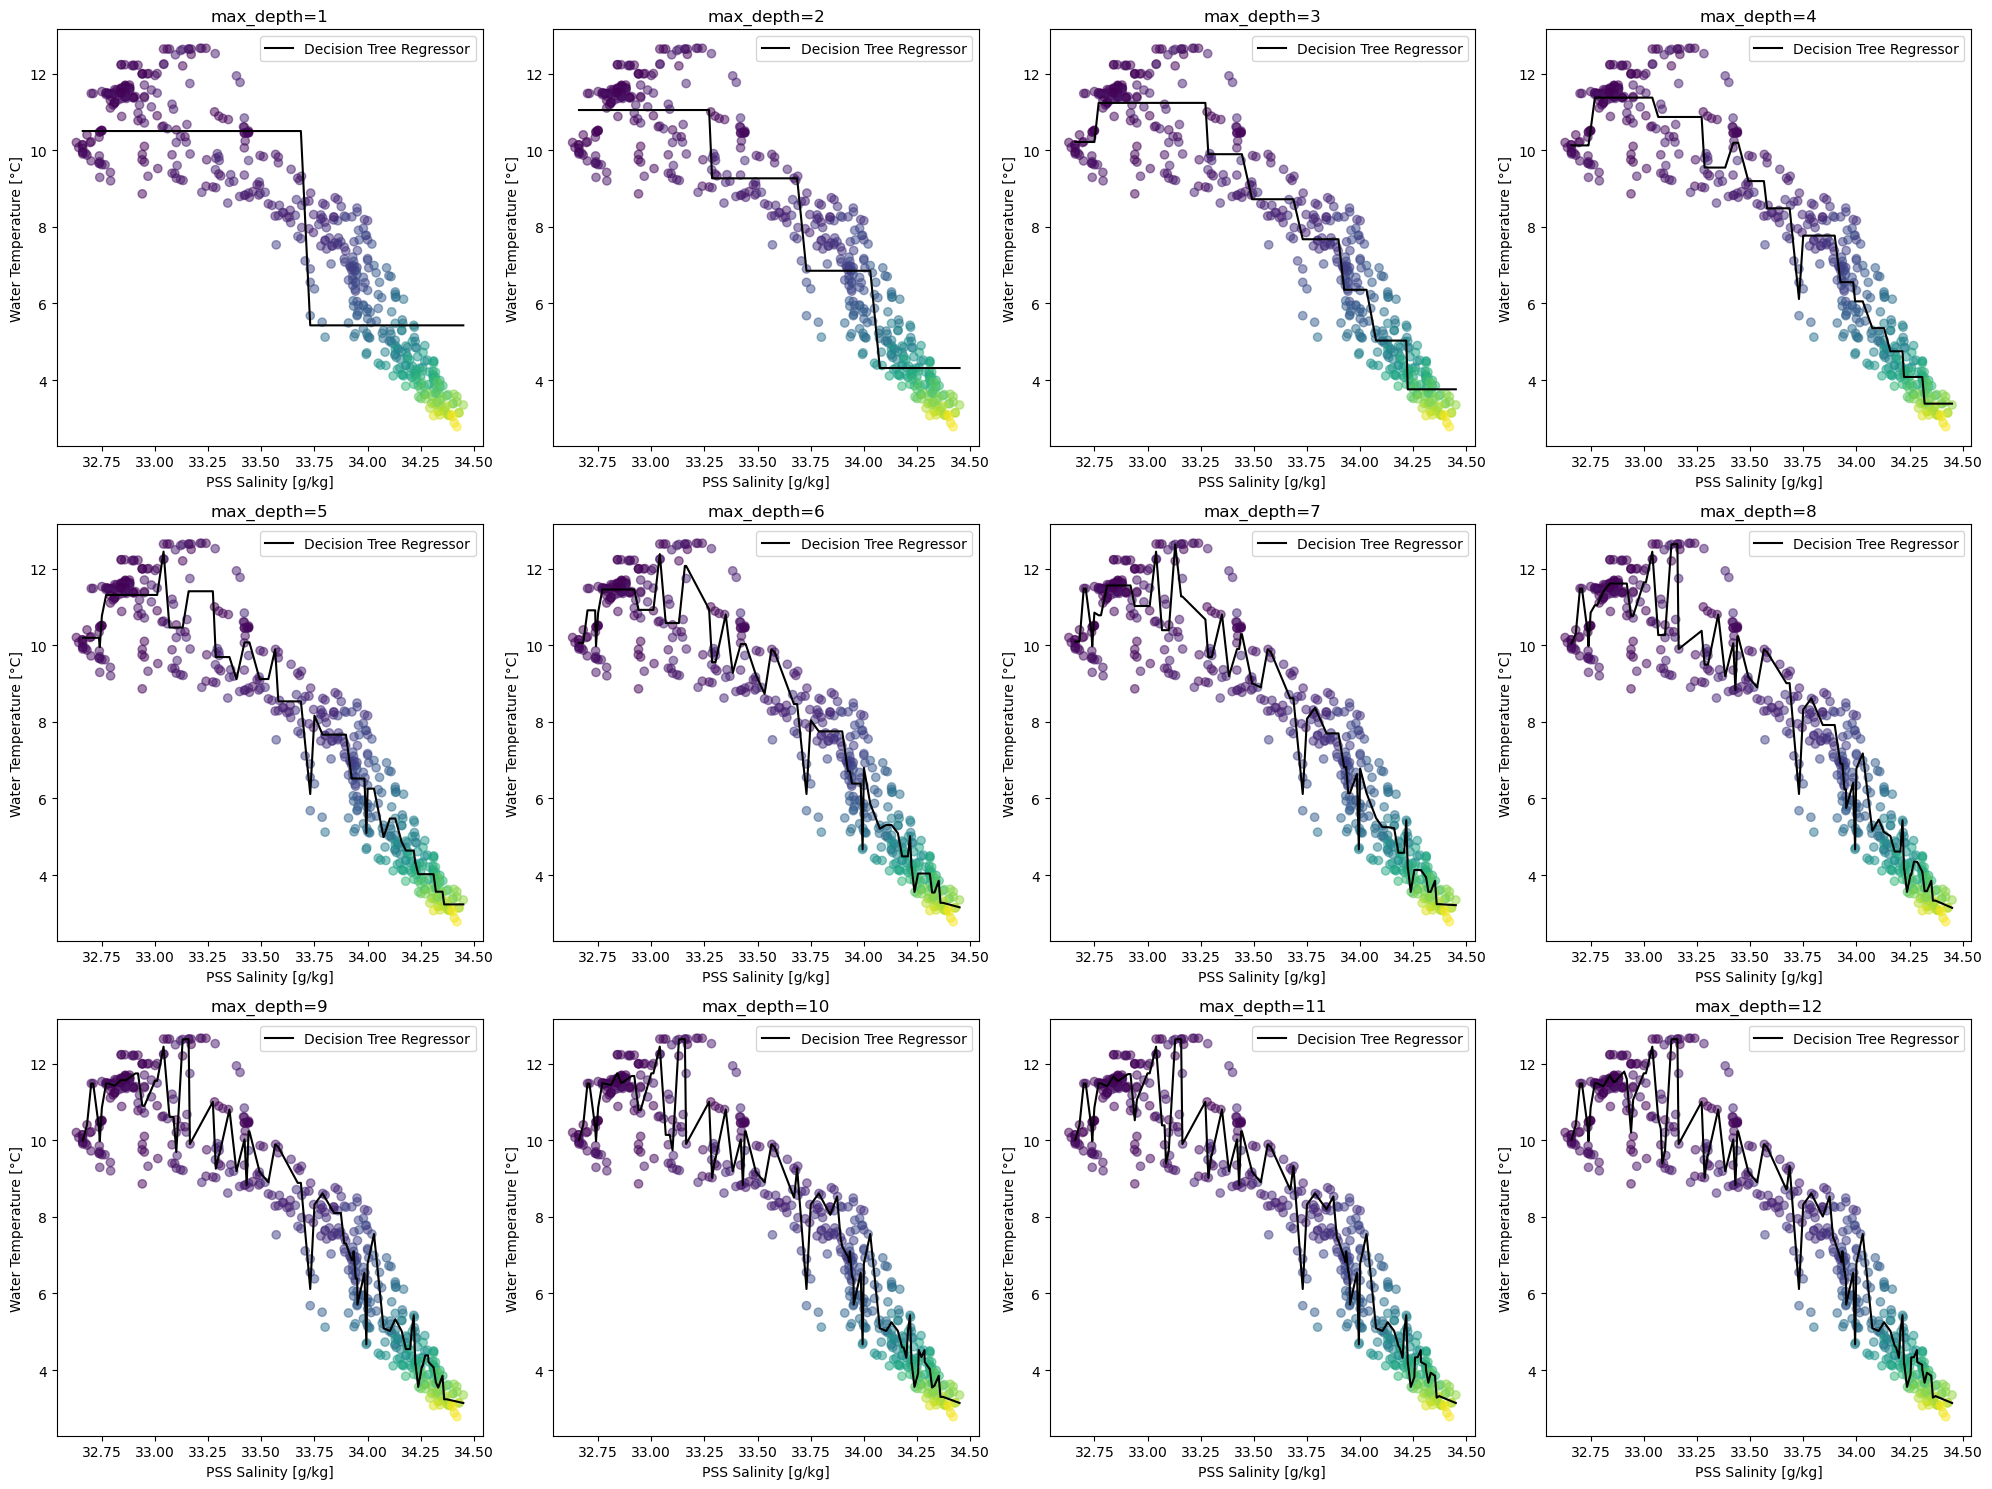

In [35]:
dtr = np.empty(12, dtype=object) 
y_pred_dt = np.empty(12, dtype=object) 
y_pred_dt_ordered = np.empty(12, dtype=object) 

fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # 3 rows, 4 columns of subplots

for i in range(12):
    dtr[i] = DecisionTreeRegressor(max_depth=i+1)
    dtr[i].fit(X_train,y_train)
    y_pred_dt[i] = dtr[i].predict(X_test)
    row = i // 4 # determine which row to plot the subplot on
    col = i % 4 # determine which column to plot the subplot on
    axs[row, col].scatter(bottle['Salnty'], bottle['T_degC'], c=bottle['Depthm'], cmap='viridis', alpha=0.5)
    y_pred_dt_ordered[i] = y_pred_dt[i][index]
    axs[row, col].plot(X_test_ordered, y_pred_dt_ordered[i], label="Decision Tree Regressor", color='k')
    axs[row, col].set_xlabel('PSS Salinity [g/kg]')
    axs[row, col].set_ylabel('Water Temperature [°C]')
    axs[row, col].set_title(f"max_depth={i+1}")
    axs[row, col].legend()

plt.tight_layout()
plt.show()
    

E' utile notare come all'aumentare dell'iperparametro max_depth del DecisionTreeRegressor() il modello tenda a seguire i dati di training in modo sempre più dettagliato tendendo all'overfitting. Il parametro max_depth ottimale che permette di ottenere una metrica $R^2$ simile fra dati di training e dati di test è 3.

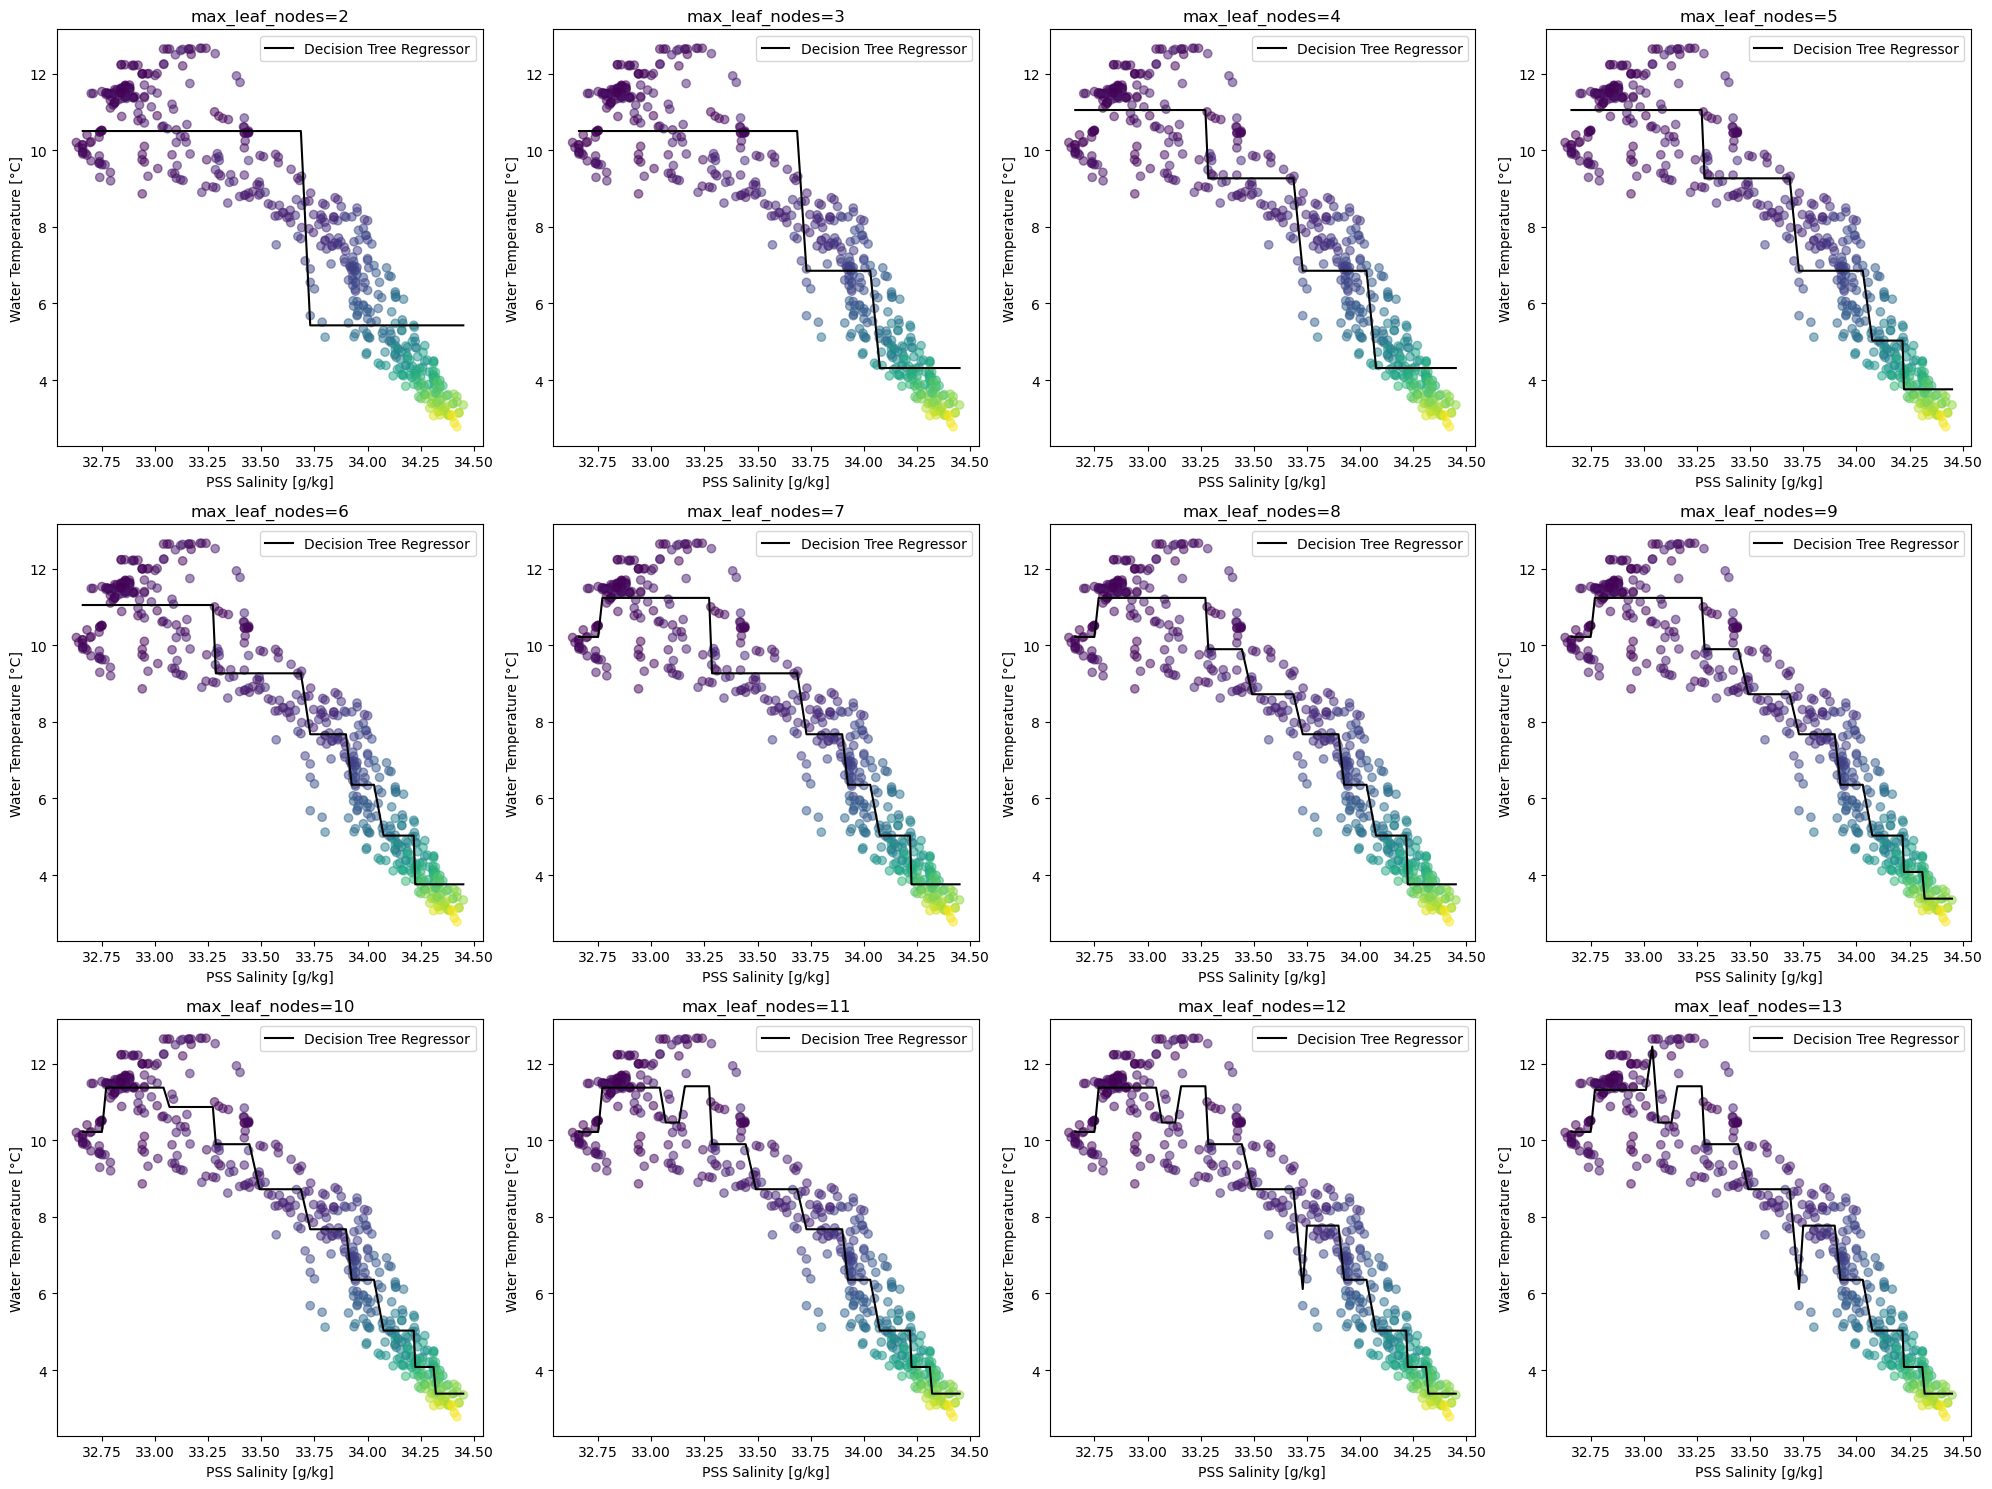

In [36]:
dtr = np.empty(12, dtype=object) 
y_pred_dt = np.empty(12, dtype=object) 
y_pred_dt_ordered = np.empty(12, dtype=object) 

fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # 3 rows, 4 columns of subplots

for i in range(12):
    dtr[i] = DecisionTreeRegressor(max_leaf_nodes=i+2)
    dtr[i].fit(X_train,y_train)
    y_pred_dt[i] = dtr[i].predict(X_test)
    row = i // 4 # determine which row to plot the subplot on
    col = i % 4 # determine which column to plot the subplot on
    axs[row, col].scatter(bottle['Salnty'], bottle['T_degC'], c=bottle['Depthm'], cmap='viridis', alpha=0.5)
    y_pred_dt_ordered[i] = y_pred_dt[i][index]
    axs[row, col].plot(X_test_ordered, y_pred_dt_ordered[i], label="Decision Tree Regressor", color='k')
    axs[row, col].set_xlabel('PSS Salinity [g/kg]')
    axs[row, col].set_ylabel('Water Temperature [°C]')
    axs[row, col].set_title(f"max_leaf_nodes={i+2}")
    axs[row, col].legend()

plt.tight_layout()
plt.show()

Come per l'iperparametro max_depth, anche aumentando max_leaf_nodes l'albero decisionale tende ad una maggiore complessità portando all'overfitting. Il parametro max_leaf_nodes ottimale scelto che permette di ottenere una metrica $R^2$ simile fra dati di training e dati di test è 9.

### KNN Regressor 

In [37]:
knnr = KNeighborsRegressor(n_neighbors=12)
knnr.fit(X_train,y_train)
y_pred_knnr = knnr.predict(X_test)

r_2_train[2] = knnr.score(X_train,y_train)
r_2_test[2] = knnr.score(X_test,y_test)
mse[2] = mean_squared_error(y_test, y_pred_knnr)
mae[2] = mean_absolute_error(y_test, y_pred_knnr)

print('\nR2 train score:', r_2_train[2])  #Print R^2
print('\nR2 test score:', r_2_test[2])  #Print R^2
print('\nMean Squared Error:', mse[2])  #Print Mean Squared Error
print('\nMean Absolute Error:', mae[2])  #Print Mean Absolute Error


R2 train score: 0.9310865440366387

R2 test score: 0.9201653034978348

Mean Squared Error: 0.6586657477553309

Mean Absolute Error: 0.6377188552188552


In [38]:
y_pred_knnr_ordered = y_pred_knnr[index]

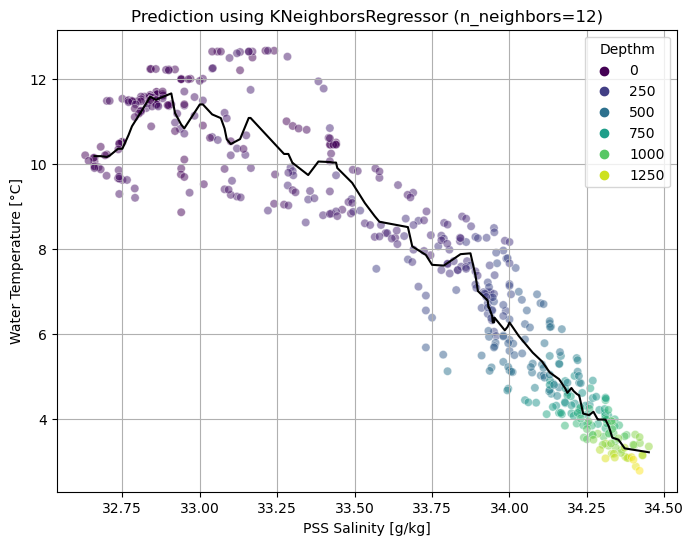

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_knnr_ordered, label="KNN Regressor", color='k')
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using KNeighborsRegressor (n_neighbors=12)')
plt.show()

In [40]:
#Predict values outside X range
x_3 = np.array([[30,31,32,33,34,35,36,37,38]])
x_3 = x_3.reshape(-1, 1)
y_pred_dtr_3 = knnr.predict(x_3)
y_pred_dtr_3

array([[10.18      ],
       [10.18      ],
       [10.18      ],
       [11.39666667],
       [ 6.2675    ],
       [ 3.21416667],
       [ 3.21416667],
       [ 3.21416667],
       [ 3.21416667]])

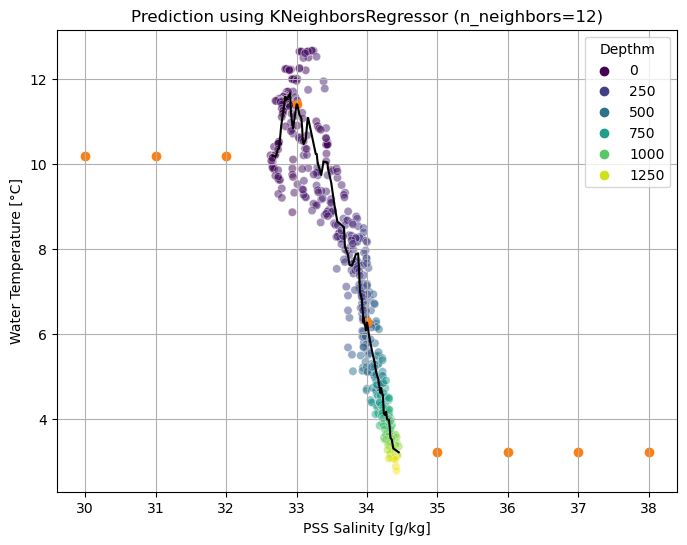

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_ordered, y_pred_knnr_ordered, label="KNN Regressor", color='k')
plt.scatter(x_3, y_pred_dtr_3)
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using KNeighborsRegressor (n_neighbors=12)')
plt.show()

Il KNN Regressor si comporta molto bene all'interno del range del dataset considerato. Tuttavia, come nel caso del Decision Tree Regressor, i valori di salinità predetti fuori dal range di dati caricati è costante e non rappresentativo del fenomeno fisico.

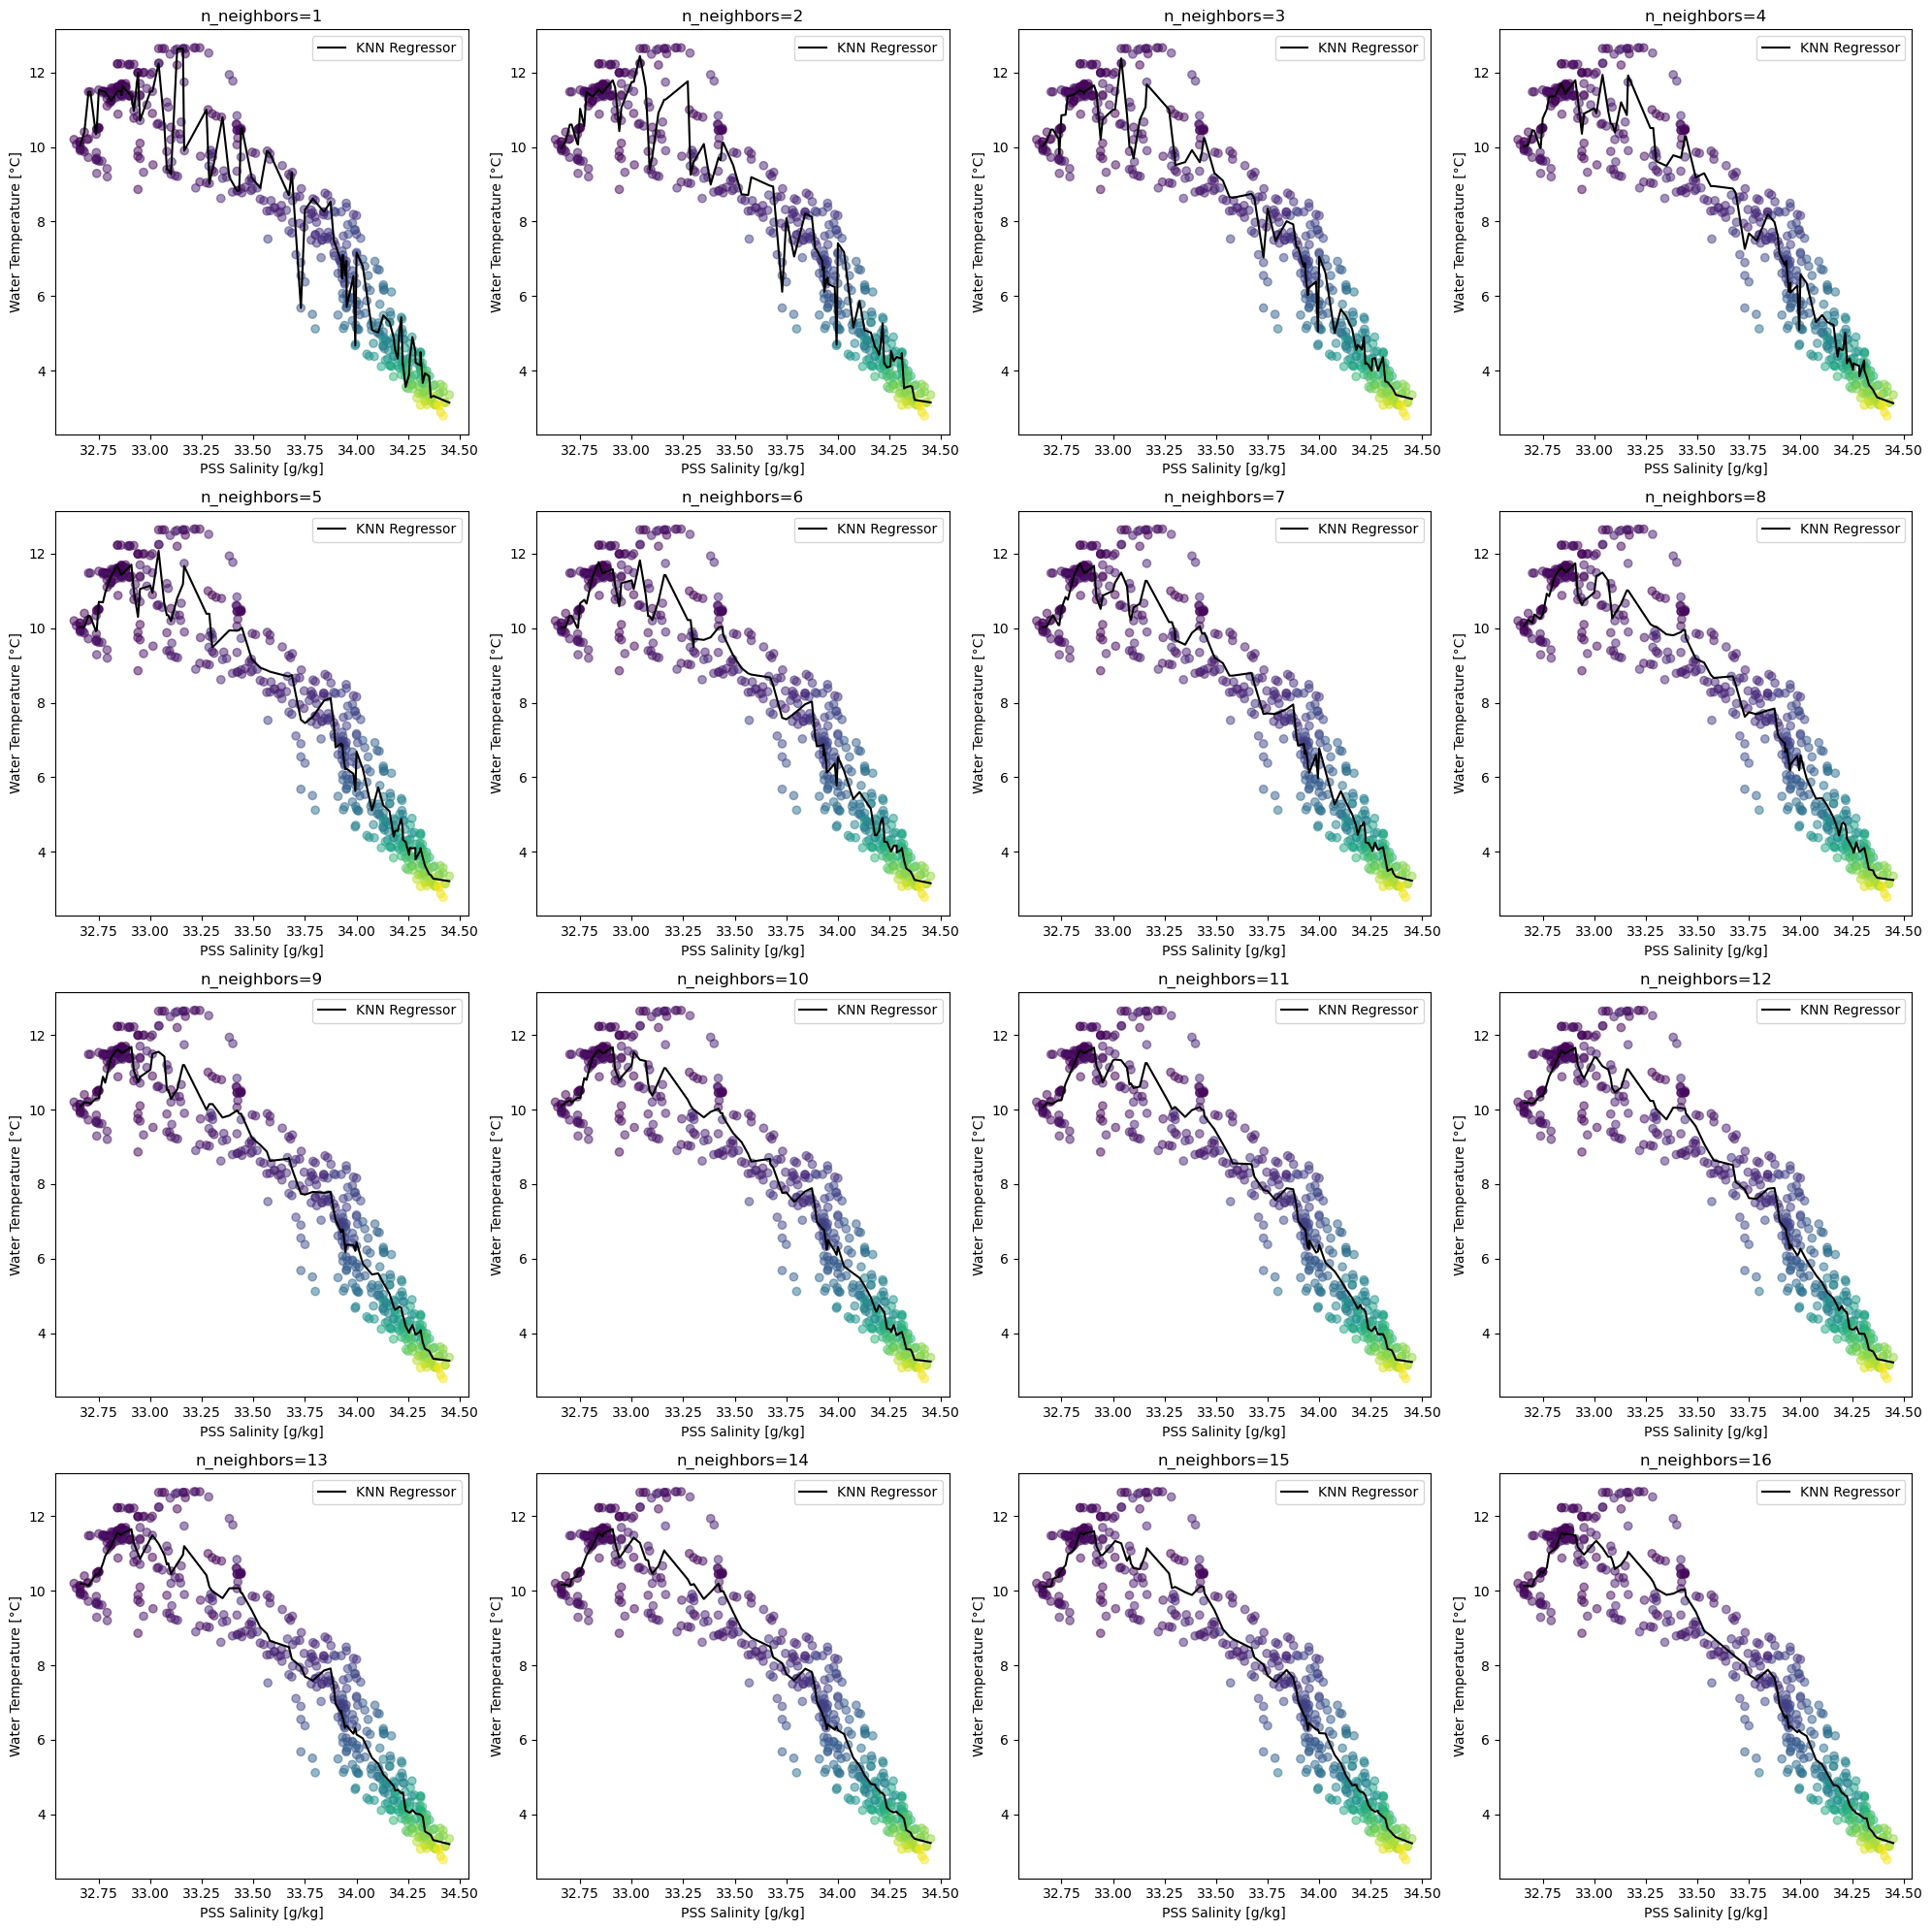

In [42]:
knnr = np.empty(16, dtype=object) 
y_pred_knnr = np.empty(16, dtype=object) 
y_pred_knnr_ordered = np.empty(16, dtype=object) 

fig, axs = plt.subplots(4, 4, figsize=(20,20)) # 4 rows, 4 columns of subplots

for i in range(16):
    knnr[i] = KNeighborsRegressor(n_neighbors=i+1)
    knnr[i].fit(X_train,y_train)
    y_pred_knnr[i] = knnr[i].predict(X_test)
    row = i // 4 # determine which row to plot the subplot on
    col = i % 4 # determine which column to plot the subplot on
    axs[row, col].scatter(bottle['Salnty'], bottle['T_degC'], c=bottle['Depthm'], cmap='viridis', alpha=0.5)
    y_pred_knnr_ordered[i] = y_pred_knnr[i][index]
    axs[row, col].plot(X_test_ordered, y_pred_knnr_ordered[i], label="KNN Regressor", color='k')
    axs[row, col].set_xlabel('PSS Salinity [g/kg]')
    axs[row, col].set_ylabel('Water Temperature [°C]')
    axs[row, col].set_title(f"n_neighbors={i+1}")
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [43]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,60)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn regressor with k neighbors
    knnr = KNeighborsRegressor(n_neighbors=k)
    
    #Fit the model
    knnr.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knnr.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knnr.score(X_test, y_test) 

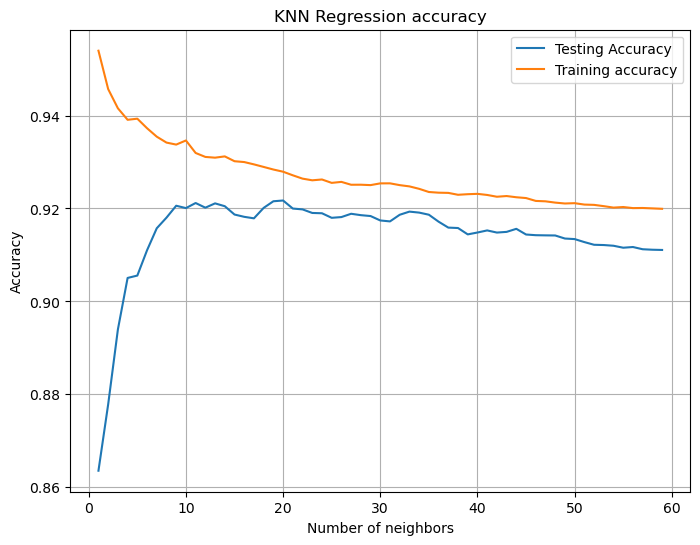

In [44]:
plt.figure(figsize=(8,6))
sns.lineplot(neighbors, test_accuracy, label='Testing Accuracy')
sns.lineplot(neighbors, train_accuracy, label='Training accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Regression accuracy')
plt.grid()
plt.legend()
plt.show()

All'aumentare dell'iperparametro n_neighbors, diminuisce la complessità del modello e la training accuracy tende a diminuire. La curva di fit tende infatti a essere più morbida grazie al numero maggiore di punti utilizzati per il calcolo della media. L'iperparametro n_neighbors ottimale scelto è 12.

### Polynomial Regressor

In [45]:
# create polynomial features
poly = PolynomialFeatures(degree=2)
X = np.array(X).reshape(-1,1)
X_poly = poly.fit_transform(X)

In [46]:
# split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=1)

In [47]:
# create and fit the model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_lr_poly = lr_poly.predict(X_test_poly)

r_2_train[3] = lr_poly.score(X_train_poly,y_train_poly)
r_2_test[3] = lr_poly.score(X_test_poly,y_test_poly)
mse[3] = mean_squared_error(y_test_poly, y_pred_lr_poly)
mae[3] = mean_absolute_error(y_test_poly, y_pred_lr_poly)

coef = lr_poly.coef_
intercept = lr_poly.intercept_

print('\nR2 train score:', r_2_train[3])  #Print R^2
print('\nR2 test score:', r_2_test[3])  #Print R^2
print('\nMean Squared Error:', mse[3])  #Print Mean Squared Error
print('\nMean Absolute Error:', mae[3])  #Print Mean Absolute Error
print('\nCoefficients:',coef) #Print Slope Coefficients
print('\nIntercept:', intercept) #Print Intercept


R2 train score: 0.9149203891907682

R2 test score: 0.9080429364005319

Mean Squared Error: 0.7586797559315007

Mean Absolute Error: 0.7156932712324577

Coefficients: [  0.         201.44508032  -3.07470035]

Intercept: -3288.4212817720354


In [48]:
X_test_poly_ordered = np.sort(X_test_poly[:,1], axis=0)
index = np.argsort(X_test_poly[:,1], axis=0).reshape(-1)
y_pred_lr_poly_ordered = y_pred_lr_poly[index]

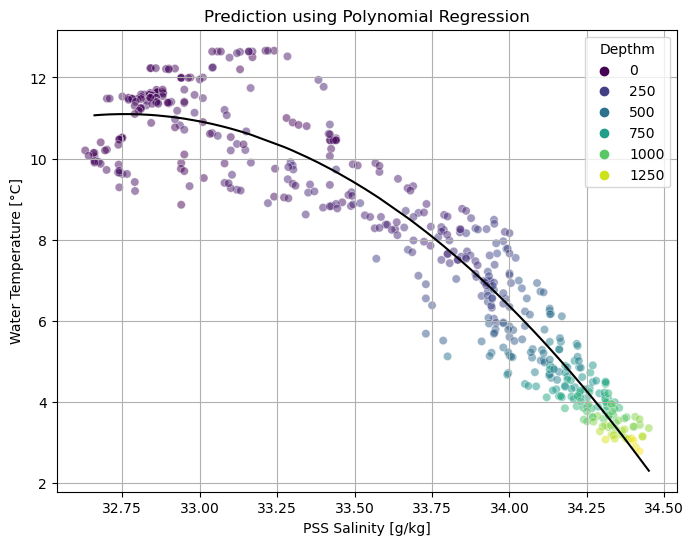

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_poly_ordered, y_pred_lr_poly_ordered, label="Polynomial regression", color='k')
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using Polynomial Regression')
plt.show()

In [50]:
#Predict values outside X range
x_4 = np.array([[1,30,900],[1,31,961],[1,32,1024],[1,33,1089],[1,34,1156],[1,35,1225],[1,36,1296],[1,37,1369],[1,38,1444]])
y_pred_lr_poly_4 = lr_poly.predict(x_4)
y_pred_lr_poly_4

array([-12.29919076,   1.58916796,   9.32812598,  10.91768328,
         6.35783988,  -4.35140423, -21.21004904, -44.21809457,
       -73.3755408 ])

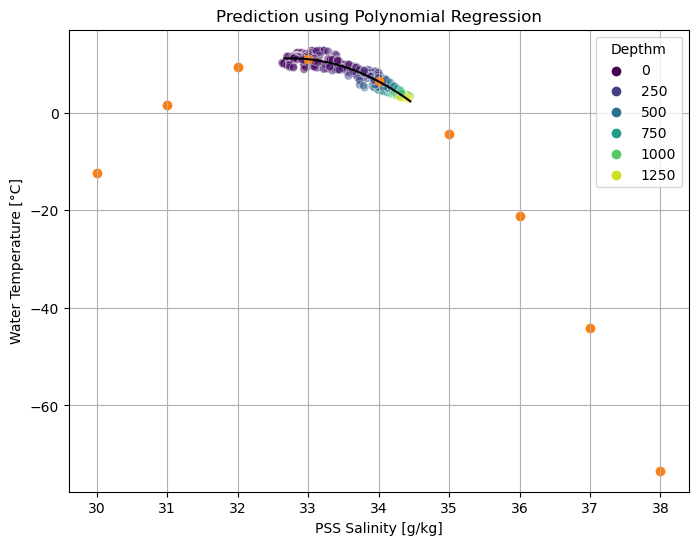

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bottle, x='Salnty', y='T_degC', hue='Depthm', palette='viridis', alpha=0.5)
plt.plot(X_test_poly_ordered, y_pred_lr_poly_ordered, label="Polynomial regression", color='k')
plt.scatter(x_4[:,1], y_pred_lr_poly_4)
plt.grid()
plt.xlabel('PSS Salinity [g/kg]')
plt.ylabel('Water Temperature [°C]')
plt.title('Prediction using Polynomial Regression')
plt.show()

Il regressore polinominale utilizzato è un polinomio di secondo grado, che si adatta molto bene al dataset esistente. E' tuttavia interessante notare che la stima dei valori di temperatura dell'acqua al di fuori del range del dataset segue un profilo quadratico e potrebbe non rappresentare correttamente la fisica del fenomeno.

### Conclusioni

 Sono stati implementati e messi a confronto quattro modelli di regressione, il Linear Regressor, il Decision Tree Regressor, il KNN regressor e un Regressor polinomiale di secondo grado. Gli ottimi valori di $R^2$ in tutti i modelli dimostrano una correlazione forte fra salinità e temperatura dell'acqua marina sui primi 500 sample del dataset presi in analisi.  Il KNN Regressor si è dimostrato superiore rispetto a tutti gli altri regressori all'interno del range dei dati considerati ($R^2$ test 0.92, MSE=0.66, MAE=0.64). E' tuttavia risultato inutilizzabile al di fuori di tale range, come anche il decision tree regressor. In questo caso i modelli lineari e polinominali sono gli unici in grado di estrapolare al di fuori dal range dei dati conosciuti.

In [52]:
data = [r_2_train, r_2_test, mse, mae]
data

[array([0.8571265655143632, 0.9241565296977248, 0.9310865440366387,
        0.9149203891907682], dtype=object),
 array([0.8283451511977139, 0.9141444846512349, 0.9201653034978348,
        0.9080429364005319], dtype=object),
 array([1.4162159348738739, 1.4162159348738739, 0.6586657477553309,
        0.7586797559315007], dtype=object),
 array([0.9395757292367463, 0.9395757292367463, 0.6377188552188552,
        0.7156932712324577], dtype=object)]

In [53]:
# initialize list of lists
data = [r_2_train, r_2_test, mse, mae]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Linear Regressor', 'Decision Tree Regressor', 'KNN Regressor', 'Polynomial Regressor'],
                    index=['R^2 train','R^2 test', 'MSE','MAE'])

df=df.T
df

R^2 train  R^2 test       MSE       MAE
Linear Regressor          0.857127  0.828345  1.416216  0.939576
Decision Tree Regressor   0.924157  0.914144  1.416216  0.939576
KNN Regressor             0.931087  0.920165  0.658666  0.637719
Polynomial Regressor      0.914920  0.908043  0.758680  0.715693

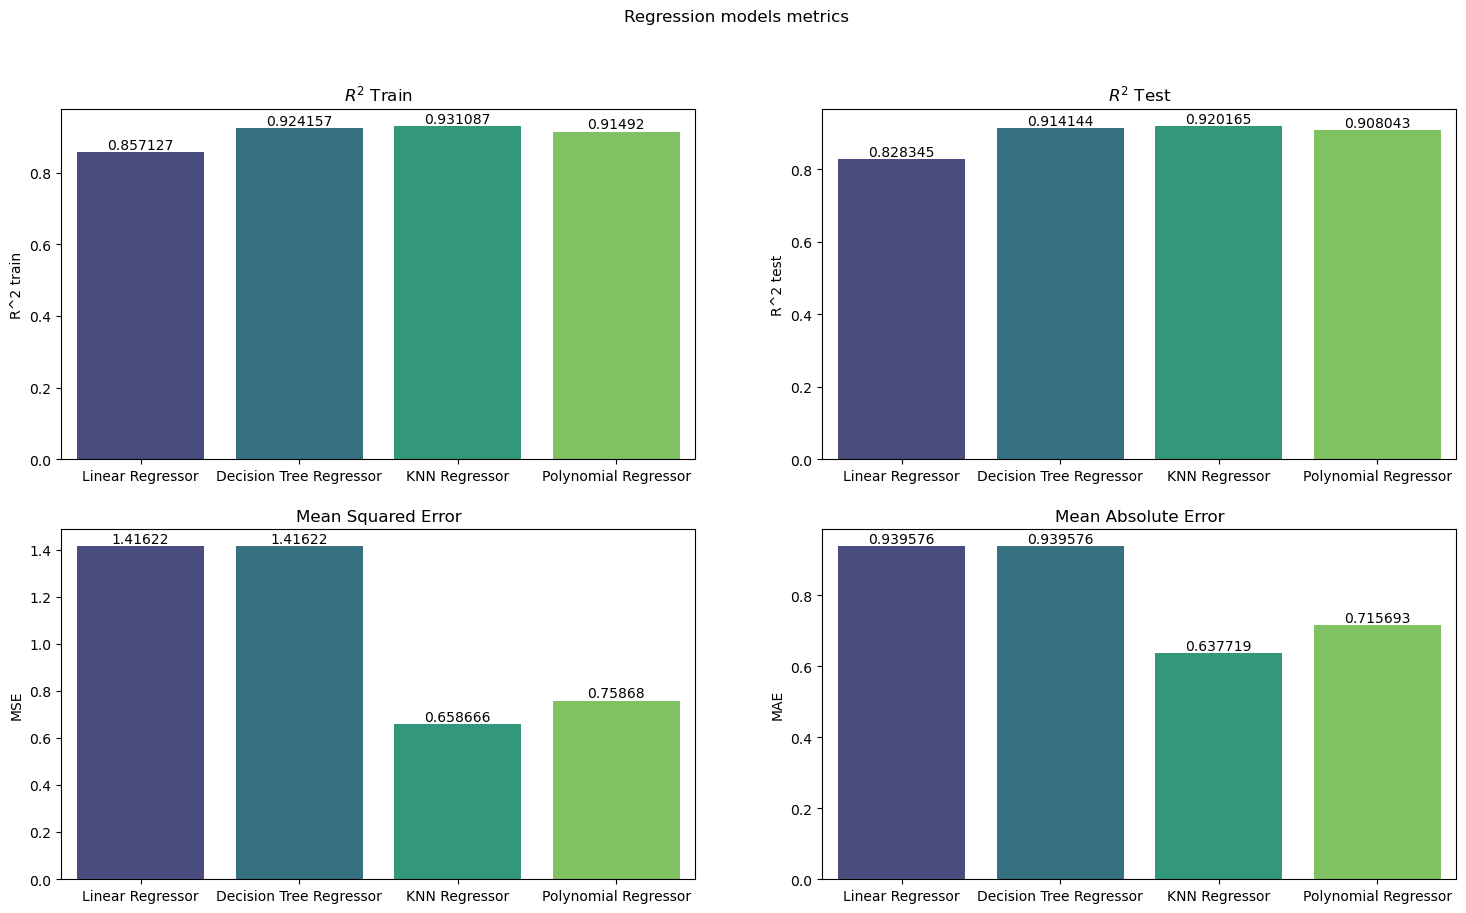

In [54]:
sns.color_palette("rocket")
fig, axs = plt.subplots(2, 2, figsize=(18,10)) # 2 rows, 2 columns of subplots
fig.suptitle('Regression models metrics')
ax1=sns.barplot(ax=axs[0, 0],data=df, x=df.index.values, y='R^2 train',palette='viridis')
ax1.bar_label(ax1.containers[0])
axs[0,0].set_title('$R^2$ Train')
ax2=sns.barplot(ax=axs[0, 1],data=df, x=df.index.values, y='R^2 test', palette='viridis')
ax2.bar_label(ax2.containers[0])
axs[0,1].set_title('$R^2$ Test')
ax3=sns.barplot(ax=axs[1, 0],data=df, x=df.index.values, y='MSE',palette='viridis')
ax3.bar_label(ax3.containers[0])
axs[1,0].set_title('Mean Squared Error')
ax4=sns.barplot(ax=axs[1, 1],data=df, x=df.index.values, y='MAE',palette='viridis')
ax4.bar_label(ax4.containers[0])
axs[1,1].set_title('Mean Absolute Error')
plt.show()

_Source_: https://inria.github.io/scikit-learn-mooc/python_scripts/trees_regression.html